In [1]:
# Link for course page - https://jovian.com/learn/machine-learning-with-python-zero-to-gbms/lesson/linear-regression-with-scikit-learn
# Link for video - https://www.youtube.com/watch?v=CVszSgTWODE

# 0* - Installing and importing modules and libraries

## 0.1 pip

In [22]:
!pip install pandas-profiling --quiet
!pip install plotly matplotlib seaborn --quiet
!pip install numpy --quiet
!pip install scikit-learn --quiet

## 0.2 Importing modules

In [353]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1 - Problem Statement (9:06)

In [10]:
# link for csv - https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

# 2 - Downloading the Data (12:25)

In [13]:
# To begin, let's download the data using the urlretrieve function from urllib.request
!pip install pandas-profiling --quiet

In [14]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [15]:
from urllib.request import urlretrieve

In [16]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x222171964d0>)

In [17]:
import pandas as pd

In [18]:
medical_df = pd.read_csv('medical.csv')
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns.

In [20]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

The "charges" column seems to be significantly skewed, as the median (50 percentile) is much lower than the maximum value.

# 3 - Exploratory Analysis and Visualization (20:45)

In [24]:
!pip install plotly matplotlib seaborn --quiet

In [25]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# all outputs are below code cells and not in a pop-up window
%matplotlib inline 

In [26]:
# The following settings will improve the default style and font sizes for our charts.
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## 3.1 Age (25:53)

In [28]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

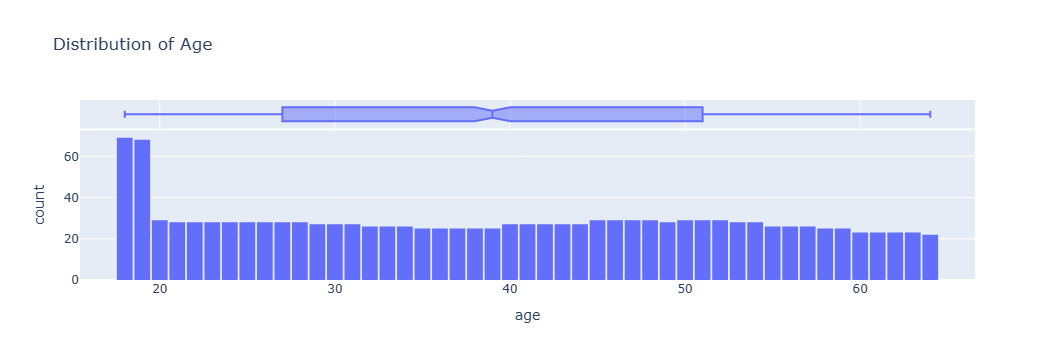

In [29]:
fig = px.histogram(medical_df, # dataframe
                   x = 'age', # values for x axis
                   marginal='box', # adding box plot
                   nbins=47, # number of bins (or bars) into which the data is divided along the x-axis.
                   title='Distribution of Age') # title of histogram
fig.update_layout(bargap=0.1) #sapce between bars
fig.show()

## 3.2 BMI (Body Mass Index) (27:16)

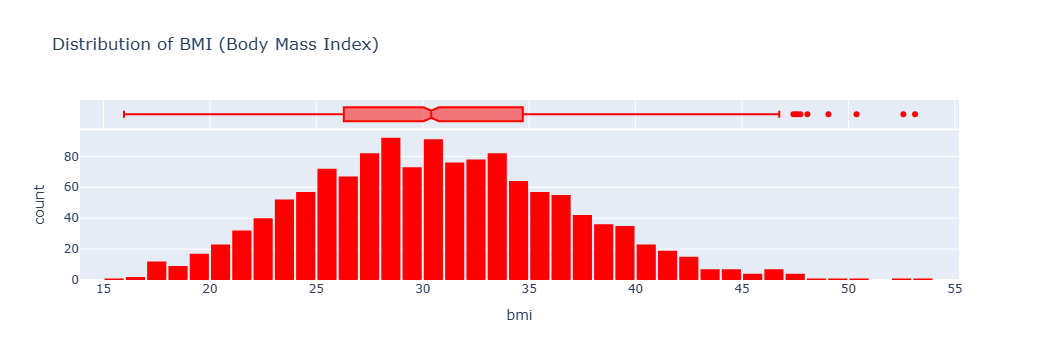

In [31]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a __Gaussian distribution__ (also known as the normal distribution) centered around the value 30, with a few outliers towards the right

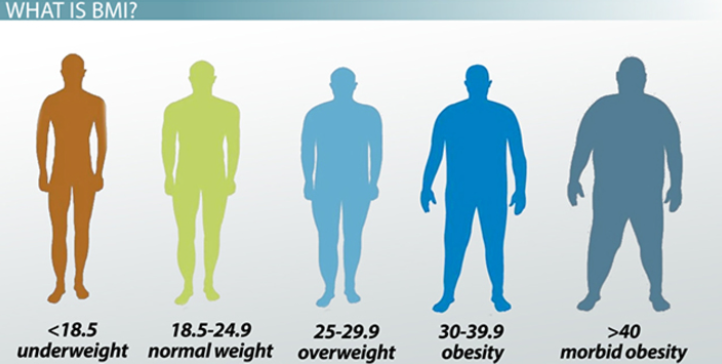

## 3.3 Charges (30:15)

### 3.3.1 Charges by Smokers

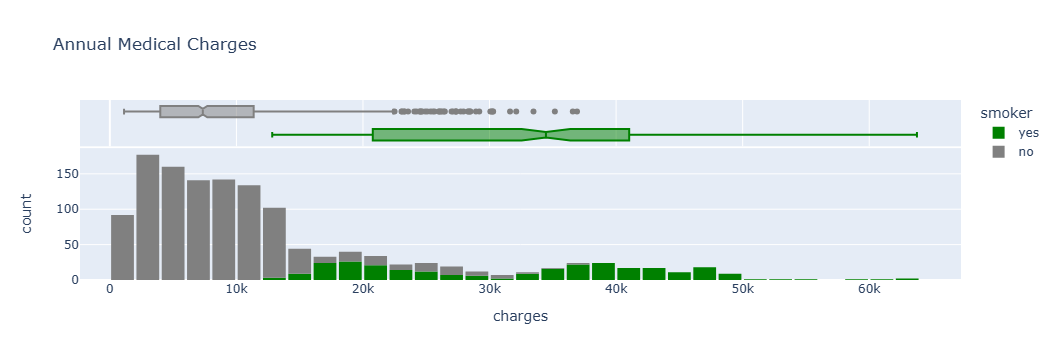

In [39]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

### 3.3.2 Charges by sex

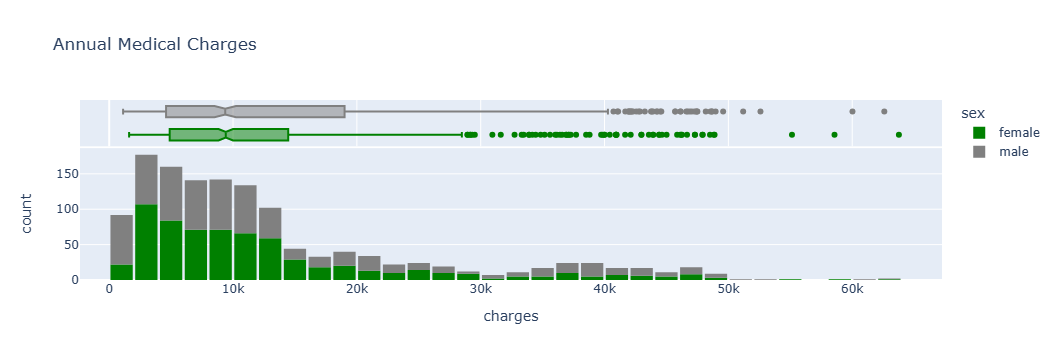

In [46]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

### 3.3.3 Charges by region

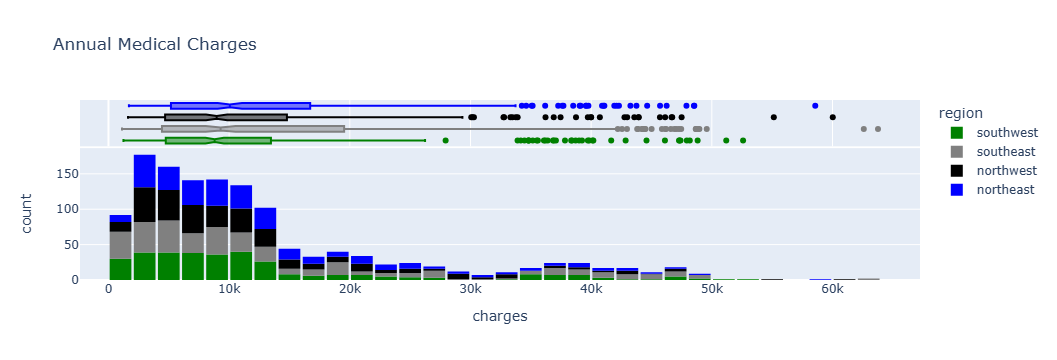

In [48]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green', 'grey', 'black', 'blue'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

## 3.4 Smoker (34:55)

### 3.4.1 Smoker

In [51]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

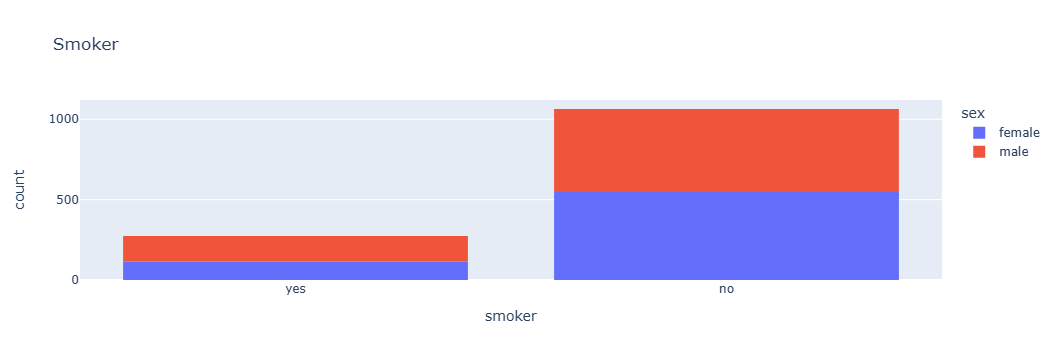

In [52]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

### 3.4.2 Sex

In [54]:
medical_df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

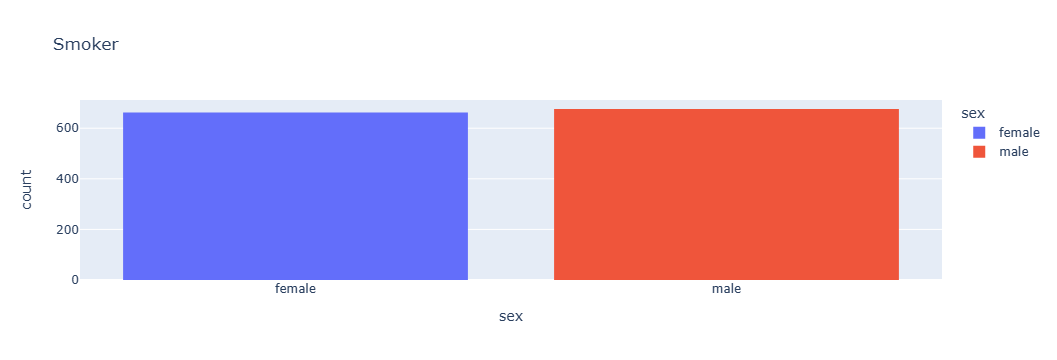

In [55]:
px.histogram(medical_df, x='sex', color='sex', title='Smoker')

### 3.4.3 region

In [57]:
medical_df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

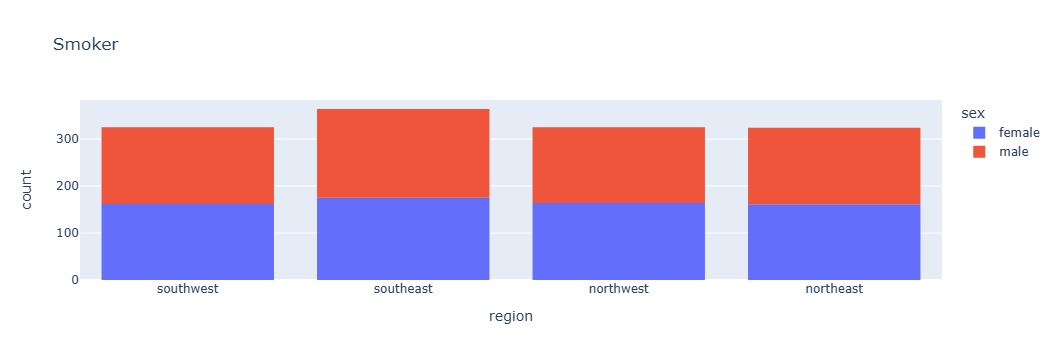

In [58]:
px.histogram(medical_df, x='region', color='sex', title='Smoker')

### 3.4.4 Children

In [64]:
medical_df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

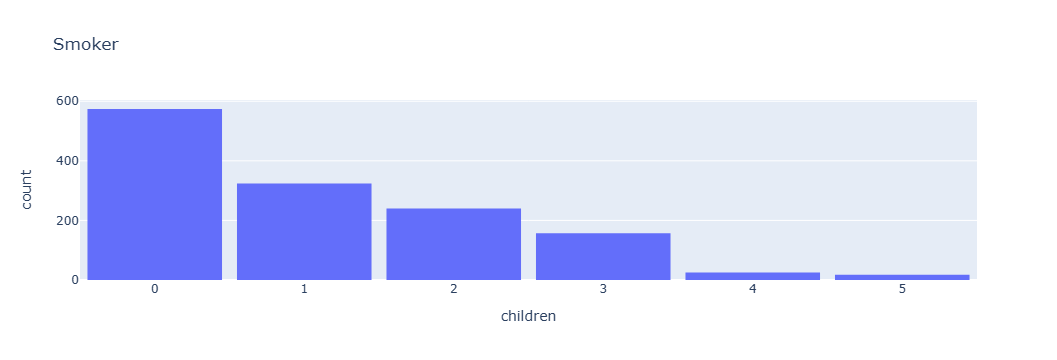

In [65]:
fig = px.histogram(medical_df, x='children', title='Smoker')
fig.update_layout(bargap = 0.1)
fig.show()

## 3.5 Age and Charges (37:22)

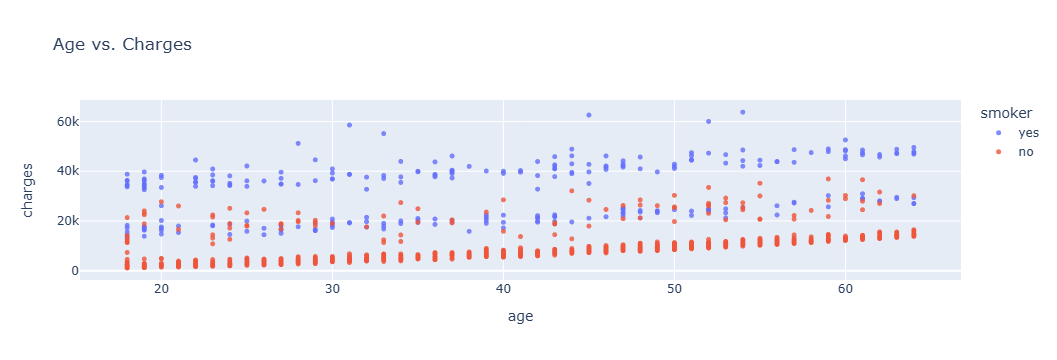

In [67]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, # visibility through
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

## 3.6 BMI and Charges (41:50)

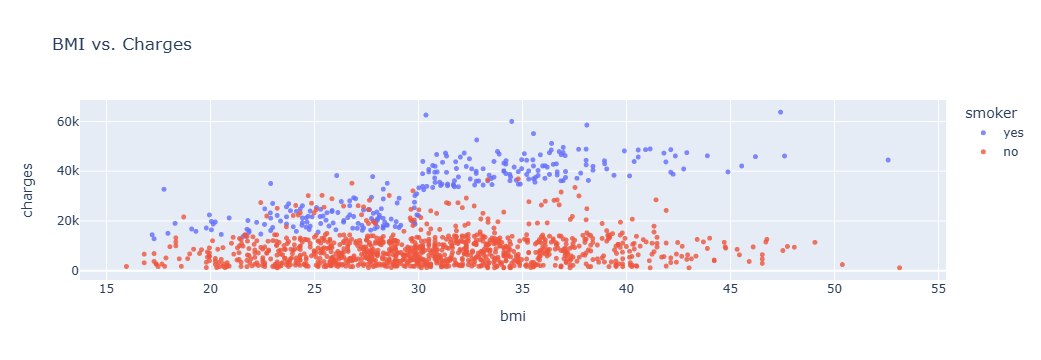

In [72]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, # visibility through
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

## 3.7 Correlation (46:35)

In [80]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [86]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [88]:
# To compute the correlation for categorical columns, they must first be converted into numeric columns.
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

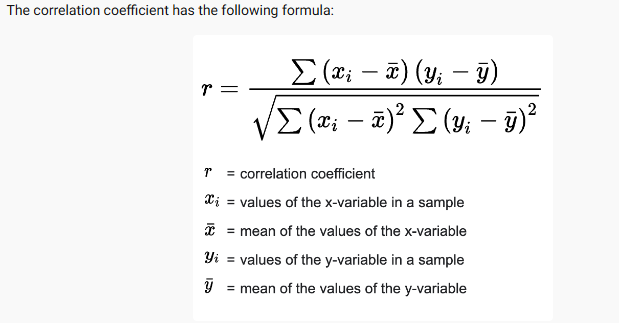

In [94]:
medical_df.corr()

ValueError: could not convert string to float: 'female'

In [ ]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

# 4 - Linear Regression using a Single Feature (57:27)

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [99]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

Next, let's visualize the relationship between "age" and "charges"

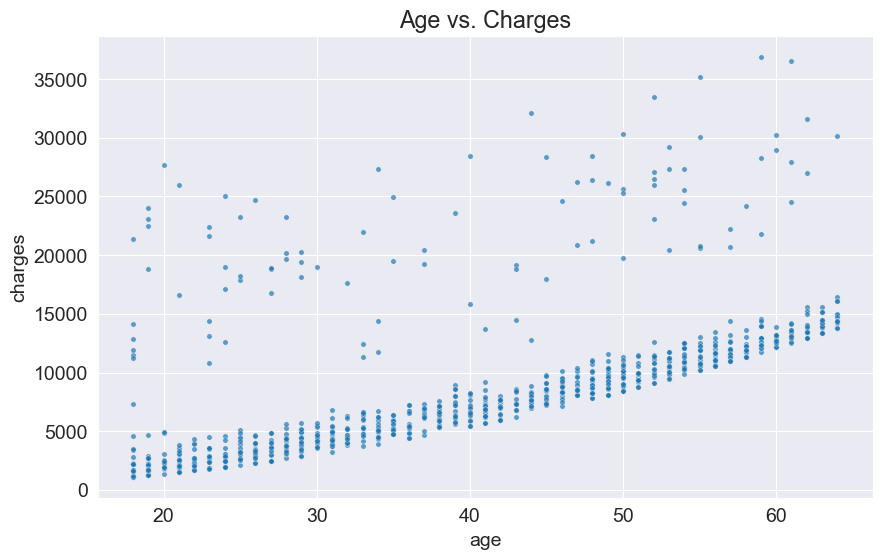

In [102]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

## 4.1 Model (1:01:00)

charges = w*age + b

In [106]:
# Let define a helper function estimate_charges, to compute charges, given age, w and b
def estimate_charges(age, w, b):
    return w * age + b

In [108]:
w = 50
b = 100

ages = non_smoker_df.age
estimated_charges = estimate_charges( ages, w, b)

Text(0, 0.5, 'Estimated Charges')

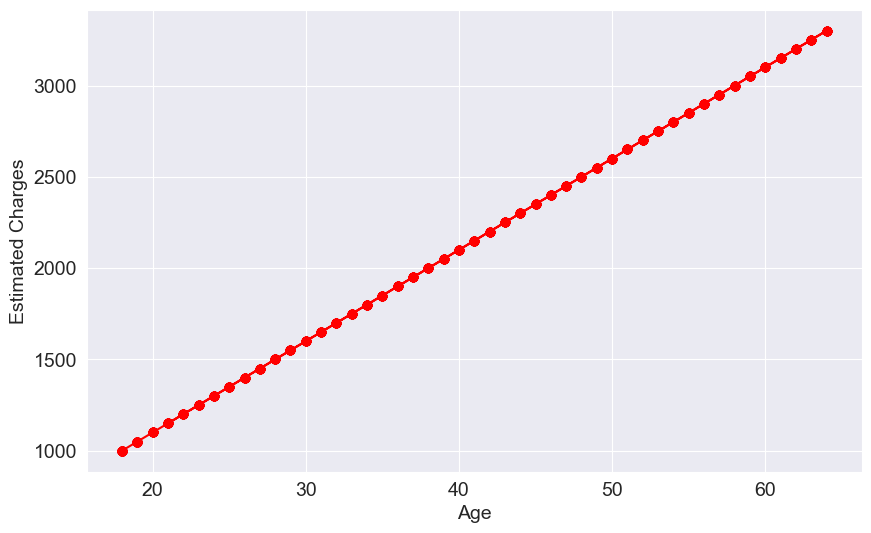

In [110]:
plt.plot(ages, estimated_charges, 'r-o') # 'r-o' is a style of the plot
                                         # 'r' stands for the color red.
                                         # '-' indicates that lines should be drawn between the data points.
                                         # 'o' specifies that circular markers should be placed at each data point.          
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

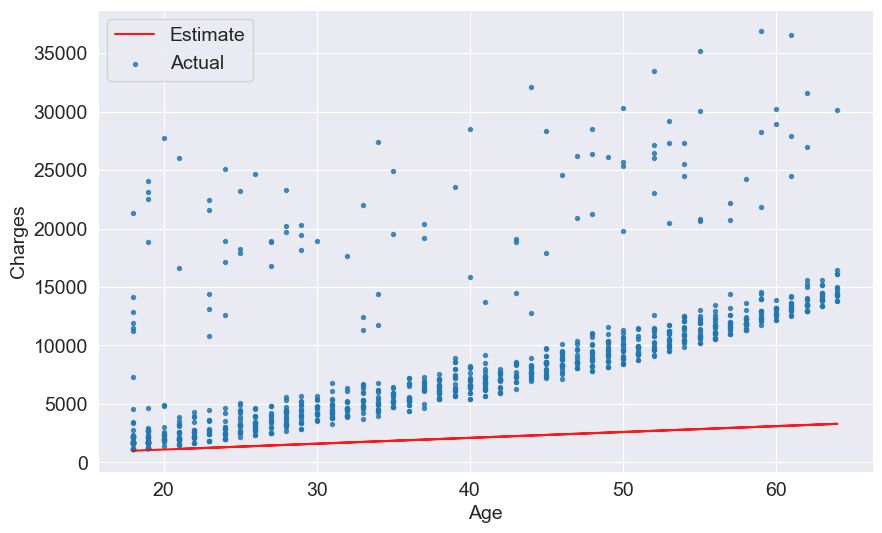

In [114]:
# We can overlay this line on the actual data, so see how well our model fits the data.
target = non_smoker_df.charges # target variable fron non-smoker df

plt.plot(ages, estimated_charges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8, alpha=0.8) # 's=8' is a size of markers
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of w
w an𝑏
b to move the line around. Let's define a helper function try_parameters which takes w and b as inputs and creates the above plot.

In [118]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

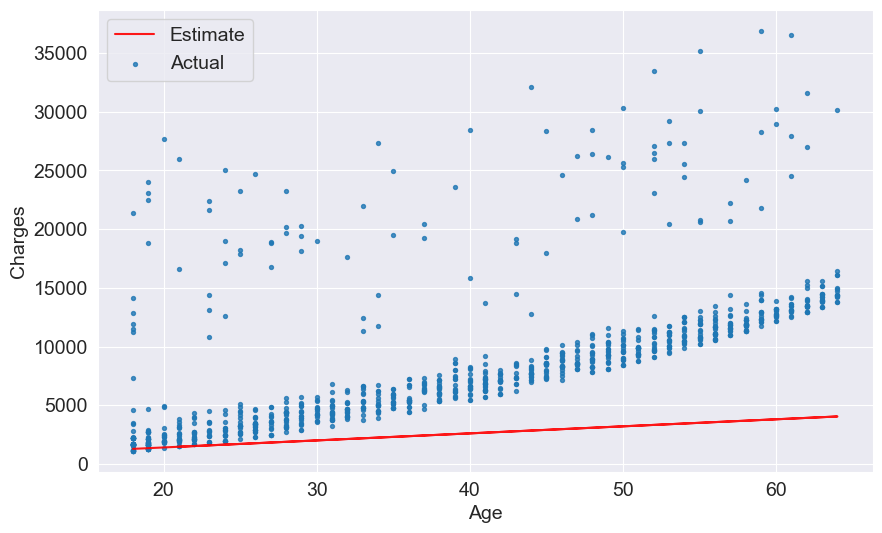

In [120]:
try_parameters(60, 200)

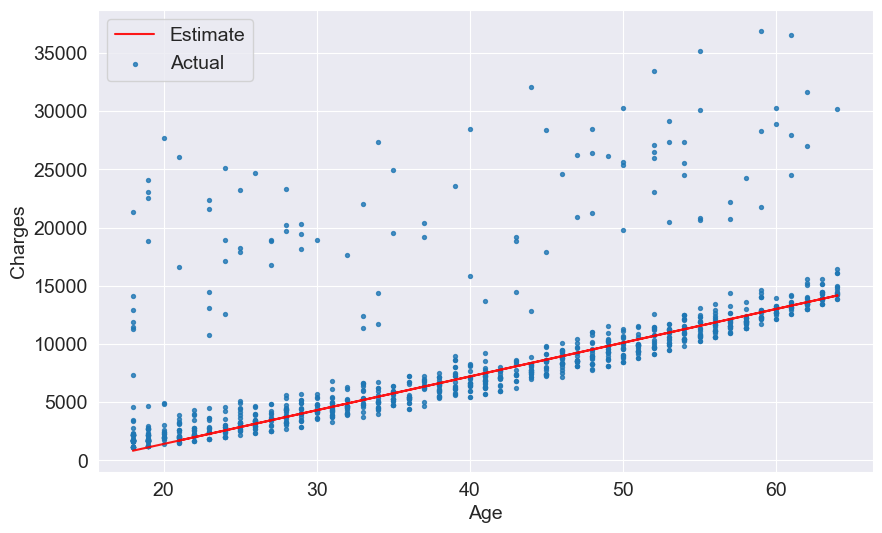

In [140]:
try_parameters(290, -4400)

## 4.2 Loss/Cost Function (1:12:40)

We can compare our model's predictions with the actual targets using the following method:

Calculate the difference between the targets and predictions (the differenced is called the "residual  ")
Square all elements of the difference matrix to remove negative valu  es.
Calculate the average of the elements in the resulting mat  rix.
Take the square root of the r  
esult
The result is a single number, known as the root mean squared error (RMSE). The above description can be stated mathematically as follows:

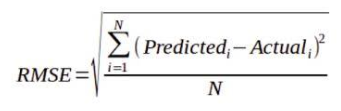

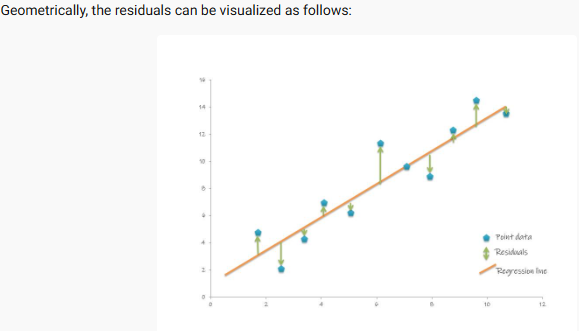

In [147]:
# Let's define a function to compute the RMSE.
!pip install numpy --quiet
import numpy as np

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

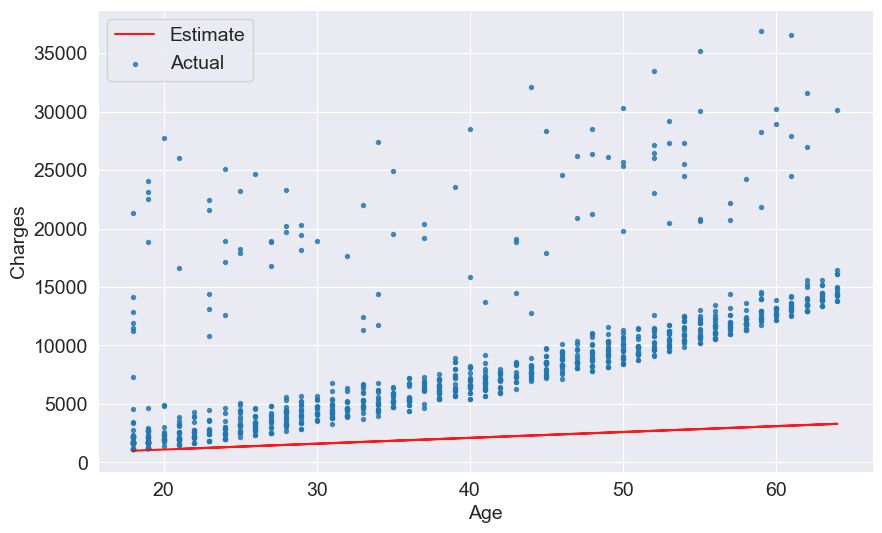

In [148]:
try_parameters(50, 100)

In [151]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, 50, 100)

In [153]:
rmse(targets, predicted)

8461.949562575493

Here's how we can interpret the above number: On average, each element in the prediction differs from the actual target by \$8461.

The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the try_parameters functions to also display the loss.

In [155]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4816.941379466545


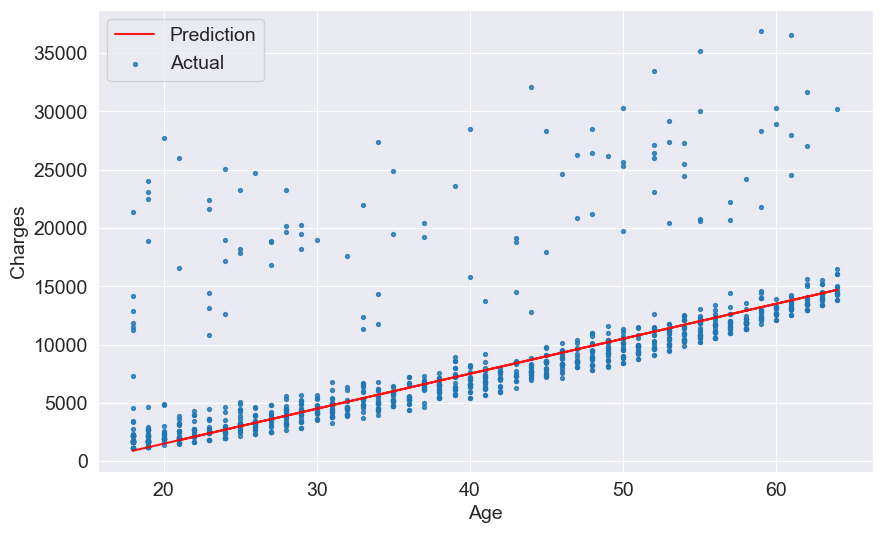

In [163]:
try_parameters(300, -4500)

## 4.3 Optimizer (1:23:55)

### 4.3.0 (Youtube lectures on OLS and SGD)

#### 4.3.0.0 Residuals, SE, SSE, MSE, RMSE

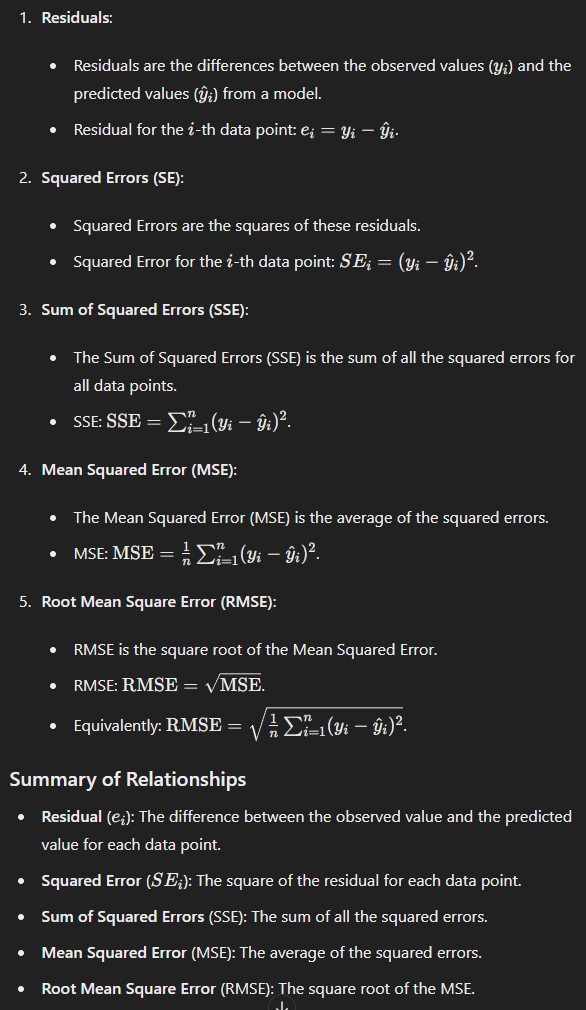

#### 4.3.0.1 OLS

Ordinary Least Squares (OLS) - https://www.youtube.com/watch?v=szXbuO3bVRk  
OLS is a method used to estimate the coefficients (parameters) of a linear regression model.  
good for smaller datasets  

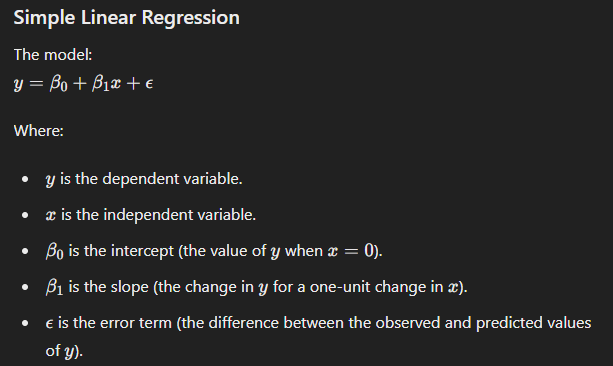  
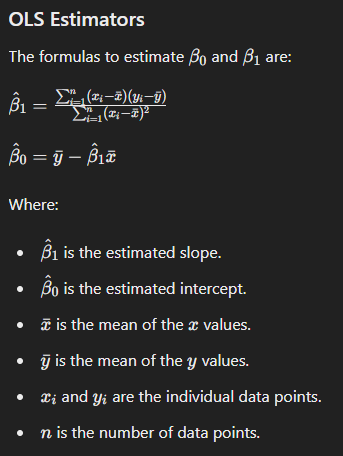 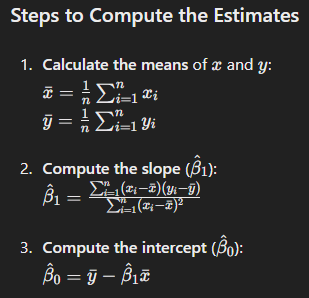  


#### 4.3.0.2 GD and SGD

Stochastic gradient descent (SGD) - https://www.youtube.com/watch?v=sDv4f4s2SB8  
good for larger datasets.  
It is a method used to find the minimum of a function (Example: In linear regression, the cost function could be the Sum of Squared Errors (SSE))  
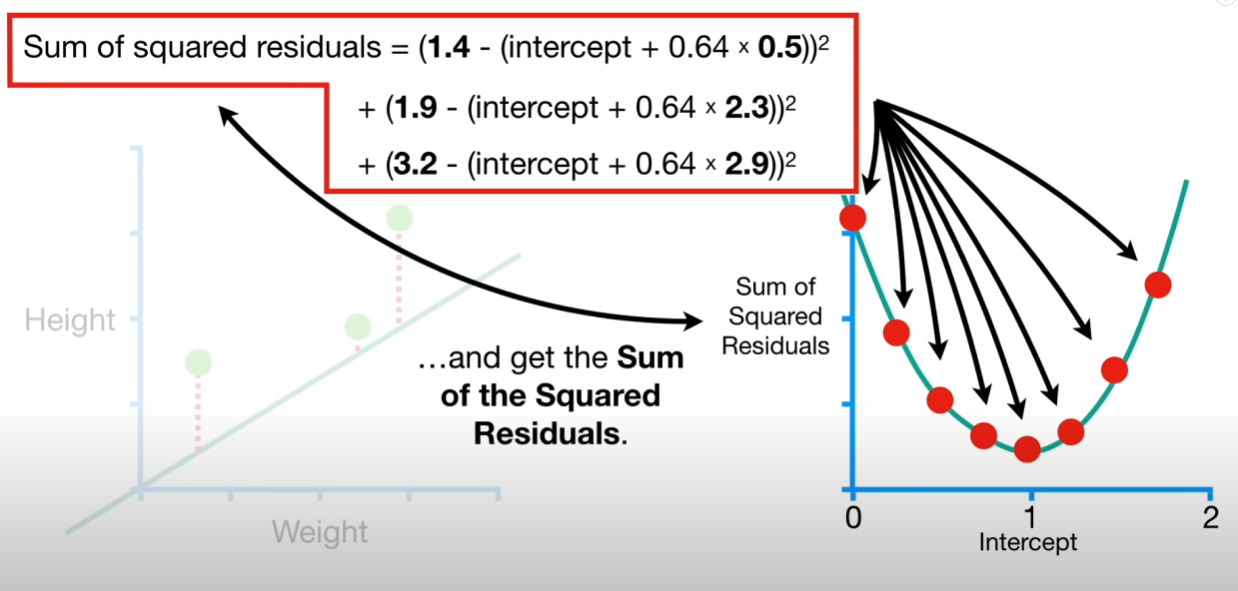  
Then we take the derivative of SSE  
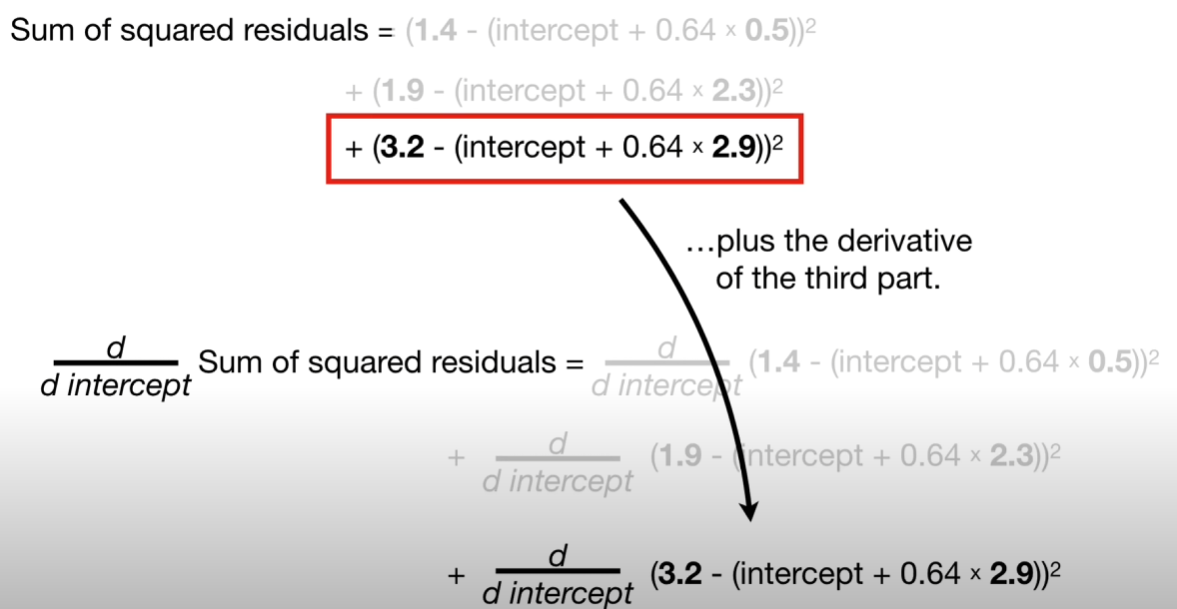  
GD is useful when it is not possible to solve for where derivative = 0, like if we used LEast Squares (OLS)  

size of the step depends on slope - we multiply the slope by learning rate  
SGD stops when step size is close to 0  
In practice, minimum step size = 0.001 or smaller  
In practice, maximum number of steps = 1000 or greater

Algorithm for GD:  
1) pick a metric as the __Loss Function__ (for example, SSE)  
2) take __derivative__ of the Loss Function (for example, derivative of SSE)
3) Pick a random value for the __intercept__
4) Calculate derivative for the value of intercept
5) use calculated derivative (slope) in __Step Size__ calculation: Step Size = Slope * Learning Rate
6) calculate new intercept = Old intercept - Step Size
7) repeat steps 4-6 until step size is < 0.001 or nu,ber of steps > 1000

By adding 3th dimension to graph we can use SGD to calculate both intercept and the slope  
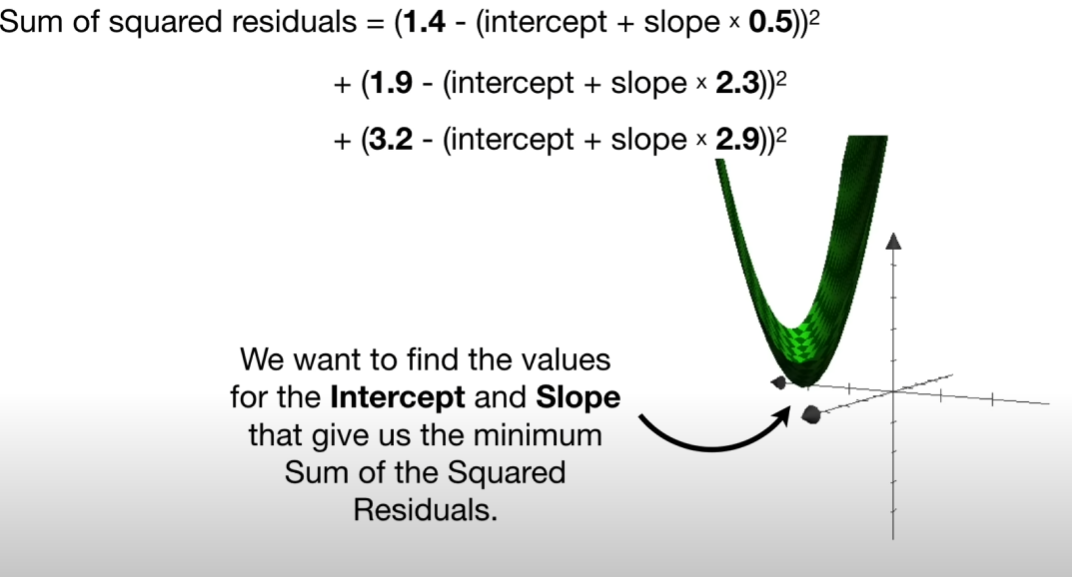

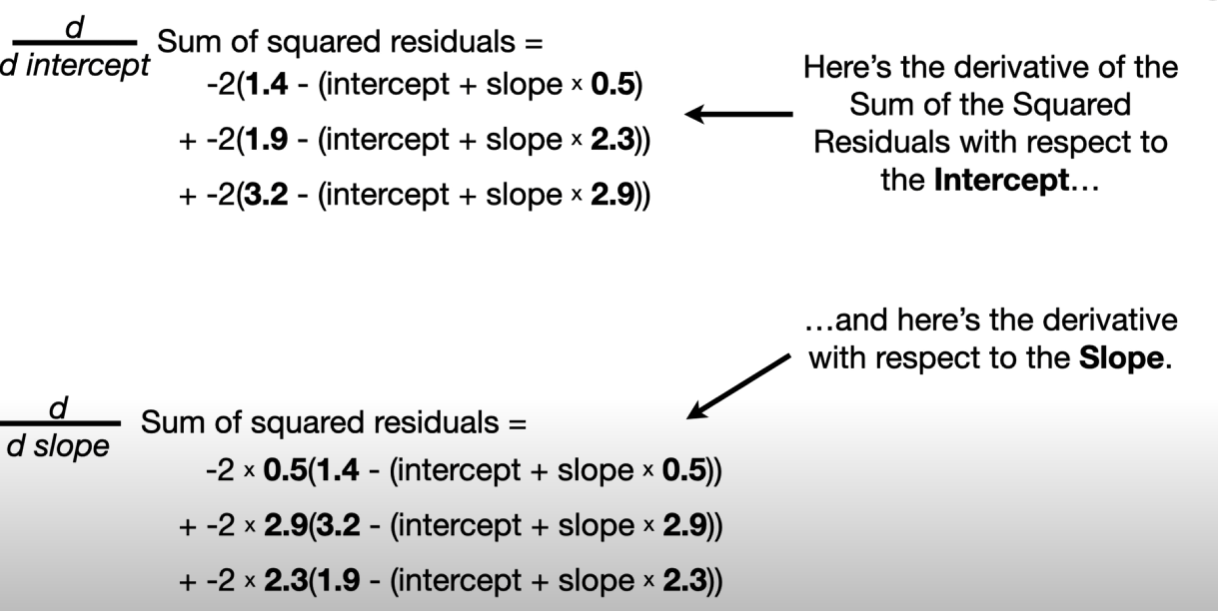  
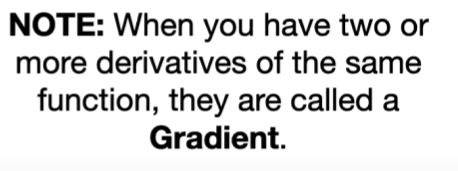 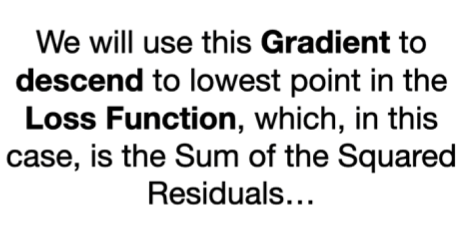

If there are lots of data we use SGD  
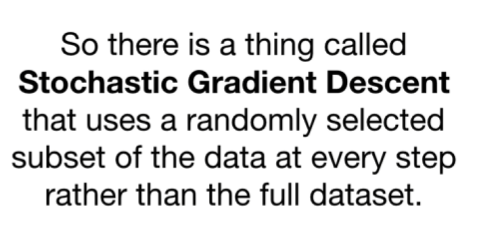 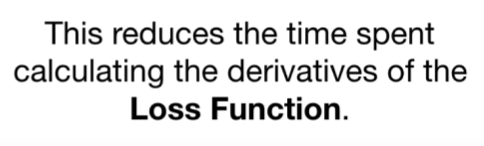

## 4.4 Linear Regression using Scikit-learn (1:26:40)

In [211]:
!pip install scikit-learn --quiet
from sklearn.linear_model import LinearRegression

In [215]:
model = LinearRegression()

In [217]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [219]:
# input X is a dataframe (2-dimensional array, not a single column)
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [221]:
model.fit(inputs, targets)

LinearRegression()

In [223]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

D:\conda\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [227]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [229]:
rmse(targets, predictions)

4662.505766636395

In [233]:
# w
print(f' slope is {model.coef_}')
# b
print(f' intercept is {model.intercept_}')

 slope is [267.24891283]
 intercept is -2091.4205565650827


RMSE Loss:  4662.505766636395


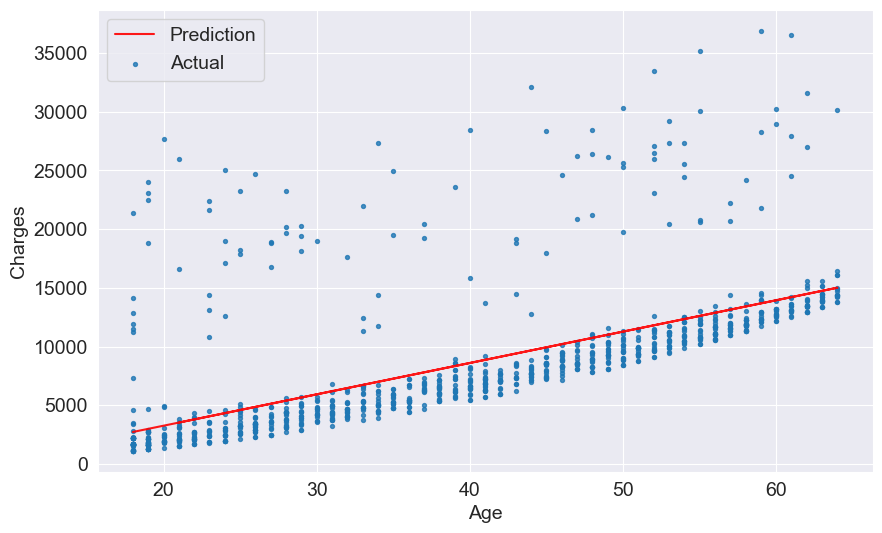

In [235]:
try_parameters(model.coef_, model.intercept_)

In [237]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

...

## 4.5 Machine Learning (1:38:50)

Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets.

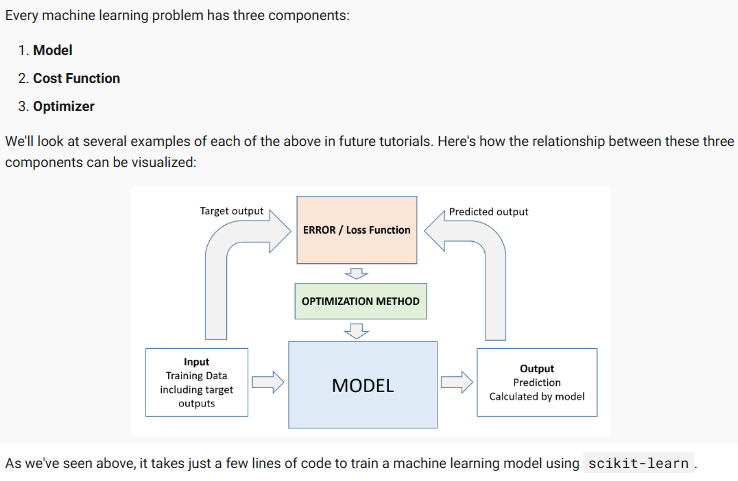

In [244]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


# 5 - Linear Regression using Multiple Features (1:45:28)

We need to change just one line of code to include the second feature - BMI.

In [249]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [251]:
# As you can see, adding the BMI doesn't seem to reduce the loss by much,
# as the BMI has a very weak correlation with charges, especially for non smokers.
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833272

__Cheat Sheet__ for plotly:  
Data Inputs:  

x: The data for the x-axis.  
y: The data for the y-axis.  
color: Data to assign colors to markers.  
size: Data to scale marker sizes.  
symbol: Data to assign symbols to markers (e.g., circles, squares).  
hover_name: Column name or array with values for hover labels.  
hover_data: Additional columns to add to hover information.  
text: Data to display as text labels on markers.  

Plot Customization:

title: Title of the plot.
labels: Dictionary mapping keys to labels for axis labels.
template: Plotly template to use (e.g., "plotly", "ggplot2", "seaborn").
width: Width of the plot in pixels.
height: Height of the plot in pixels.
margins: Margins around the plot (in pixels or percentage).  

Axes Configuration:  

log_x: Whether to use a log scale on the x-axis (True or False).  
log_y: Whether to use a log scale on the y-axis (True or False).  
category_orders: Dict with keys corresponding to dimension names and values lists of category orders.    

Marker and Line Styling:  

opacity: Marker opacity (between 0 and 1).  
size_max: Maximum marker size when size is specified.  
line_dash: Dash pattern for line.  
line_shape: Shape of the line.  

Color and Layout:  

color_continuous_scale: Color scale for continuous color data.  
color_discrete_map: Dict mapping discrete values to specific colors.  
range_color: Color range for continuous color scale.  

Axes and Grid Configuration:  

category_orders: Dict with keys corresponding to dimension names and values lists of category orders.  

Miscellaneous:  

animation_frame: Data to use for animation frame.  
animation_group: Data to use for animation grouping.  
facet_col / facet_row: Data to use for faceting along columns or rows.  

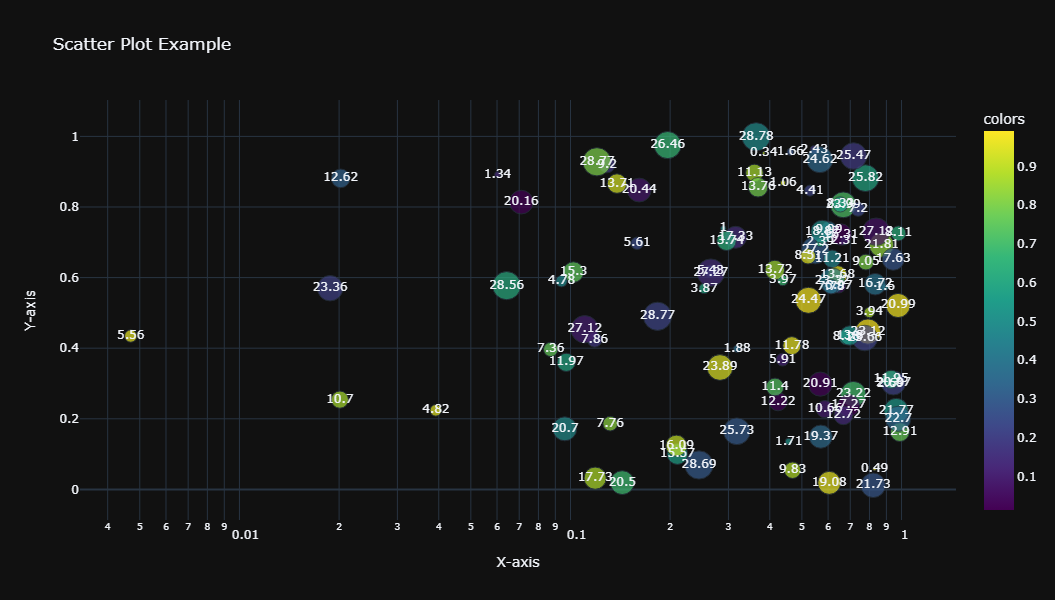

In [258]:
import plotly.express as px
import numpy as np
import pandas as pd

# Generate some random data
np.random.seed(0)
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.rand(100)
sizes = np.random.rand(100) * 30

# Create a DataFrame from the generated data
df = pd.DataFrame({
    'x': x,
    'y': y,
    'colors': colors,
    'sizes': sizes,
    'text': np.round(sizes, 2)  # Adding text for labels
})

# Create a scatter plot using Plotly Express with applicable parameters
fig = px.scatter(df, x='x', y='y', color='colors', size='sizes',
                 hover_name=df.index,
                 hover_data={'x': False, 'y': True, 'colors': True, 'sizes': ':.2f'},
                 text='text',
                 title='Scatter Plot Example',
                 labels={'x': 'X-axis', 'y': 'Y-axis'},
                 template='plotly_dark',
                 width=800, height=600,
                 log_x=True,
                 color_continuous_scale='Viridis',
                 opacity=0.7,
                 )

# Show the plot
fig.show()

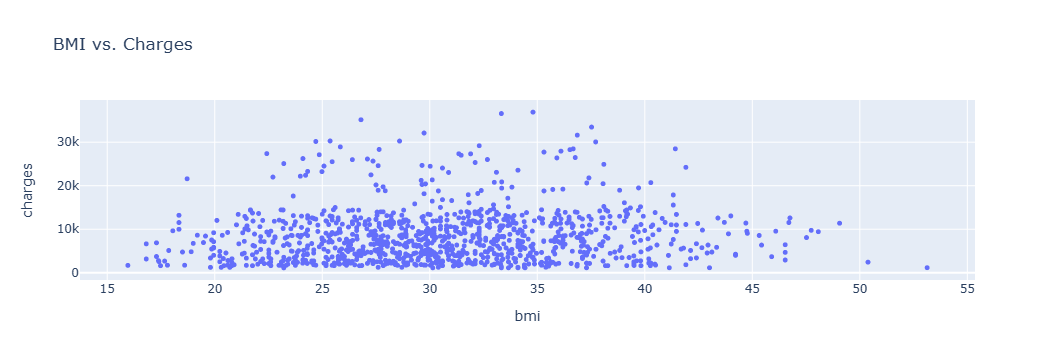

In [260]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

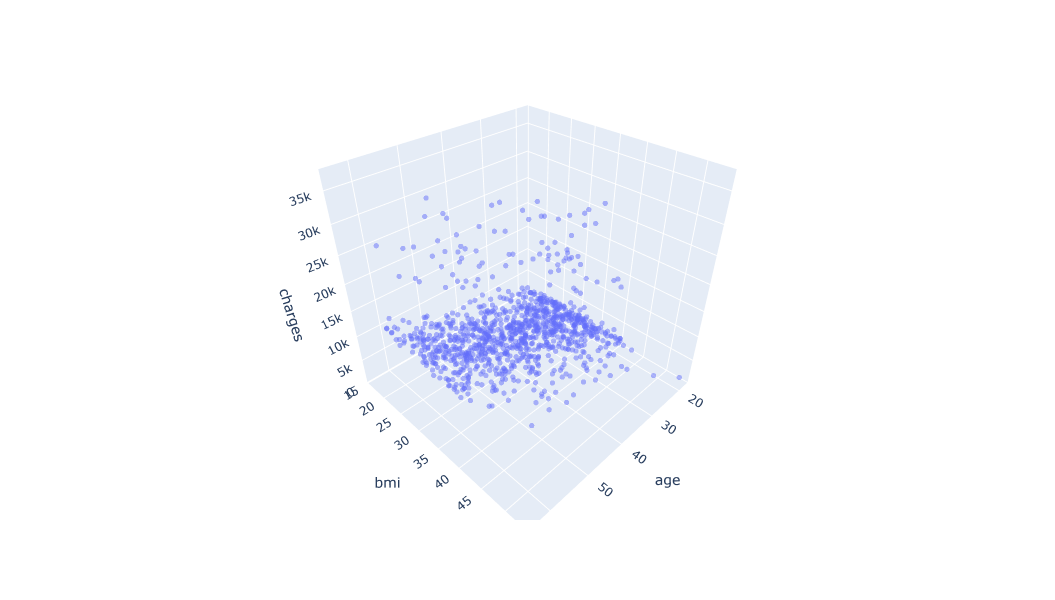

In [266]:
# We can also visualize the relationship between all 3 variables "age", "bmi" and "charges" using a 3D scatter plot.
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.update_layout(width=1000, height=600)
fig.show()

In [268]:
# it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features,
# it becomes impossible to visualize all feature at once, which is why we use measures like correlation and loss.
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488672)

In [270]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.138928704535422

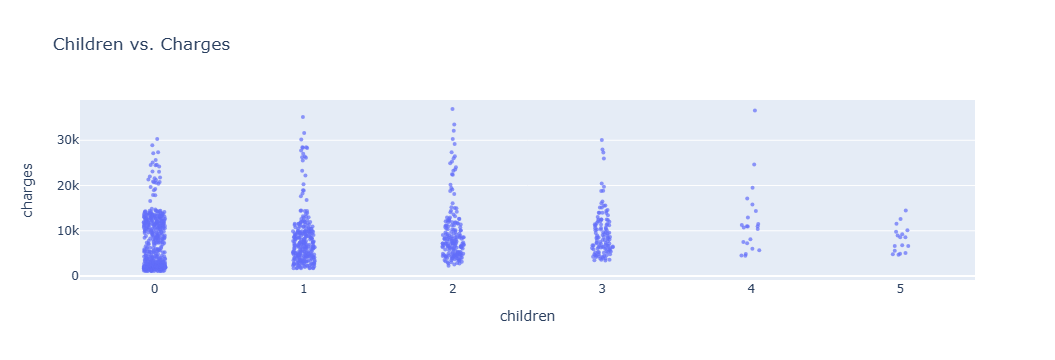

In [272]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [274]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038246


In [276]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


# 6 - Using Categorical Features for Machine Learning (1:54:50)

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:
1) 
If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and   
12) .
If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 

3) If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinalsnals

# 7 - Binary Categories (1:58:20)

## 7.1 binary

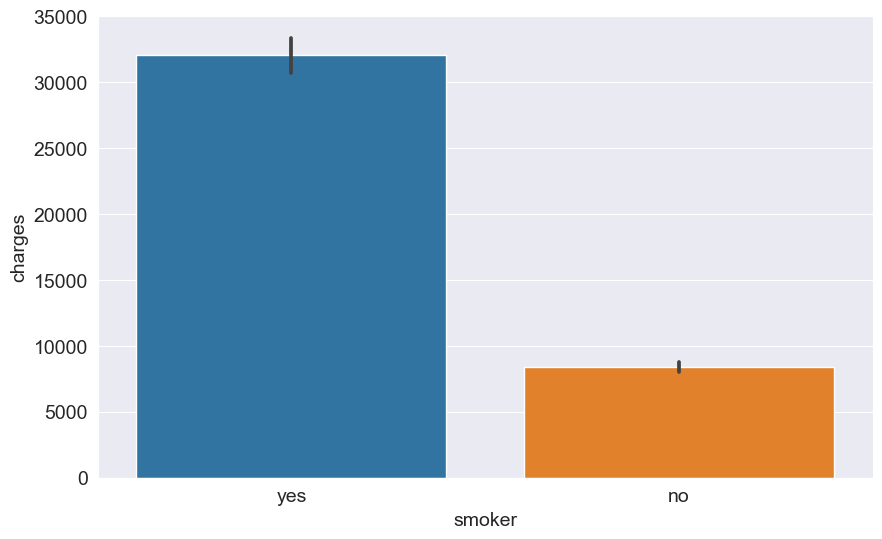

In [288]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [290]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [292]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984772

In [294]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
1333            0  
1334            0  
1335            0  
1336            0  
1337            1  

[1338 rows x 8 columns]

In [296]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

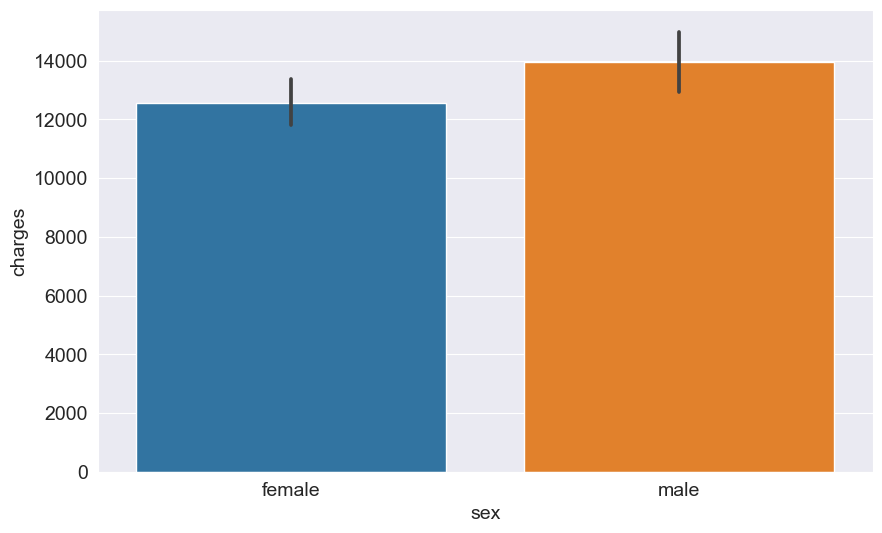

In [298]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [300]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025415

In [302]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


## 7.2 One-hot encoding

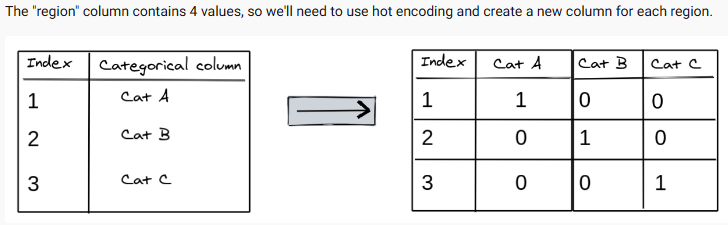

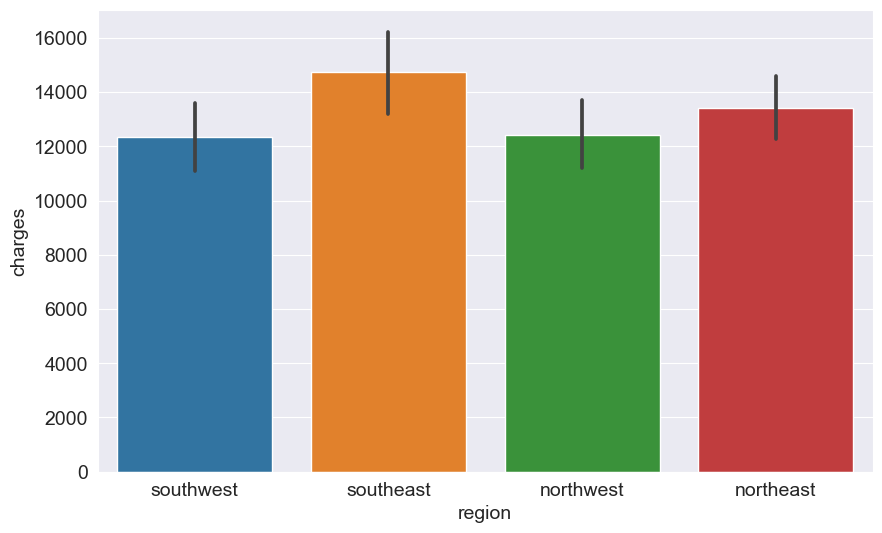

In [307]:
sns.barplot(data=medical_df, x='region', y='charges');

In [311]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [313]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [317]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  northeast  northwest  southeast  southwest  
0               1         0        0.0        0.0        0.0        1.0  
1               0         1        0.0        0.0        1.0        0.0  
2               0         1        0.0        0.0        1.0        0.0  
3               0         1        0.0        1.0        0.0        0.0  
4               0         1        0.0        1.0        0.0        0.0  
...           ...       ...        ...        ...        ...        ...  
1333            0         1        0.0        1.0        0.0        0.0  
1334            0         0        1.0        0.0        0.0        0.0  
1335            0         0        0.0        0.0        1.0        0.0  
1336            0         0        0.0        0.0        0.0        1.0  
1337            1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [319]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


# 8 Model Improvements

## 8.1 Feature Scaling

In [323]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [325]:
model.intercept_

-12525.547811195462

In [327]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

feature        weight
0          age    256.856353
1          bmi    339.193454
2     children    475.500545
3  smoker_code  23848.534542
4     sex_code   -131.314359
5    northeast    587.009235
6    northwest    234.045336
7    southeast   -448.012814
8    southwest   -373.041756
9            1 -12525.547811

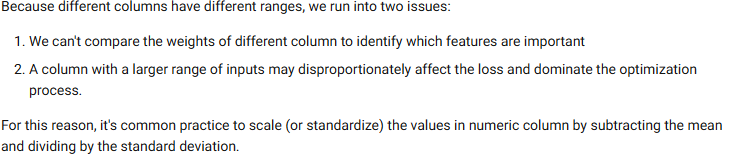  
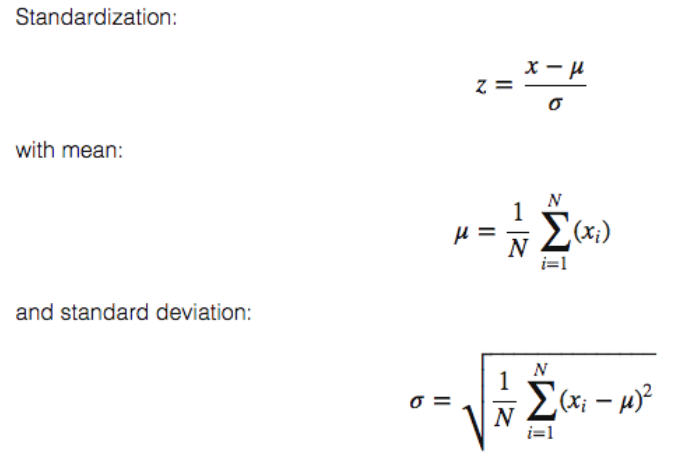

In [333]:
from sklearn.preprocessing import StandardScaler

In [335]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [337]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [339]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [341]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [343]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [345]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [347]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

feature        weight
3  smoker_code  23848.534542
9            1   8466.483215
0          age   3607.472736
1          bmi   2067.691966
5    northeast    587.009235
2     children    572.998210
6    northwest    234.045336
4     sex_code   -131.314359
8    southwest   -373.041756
7    southeast   -448.012814

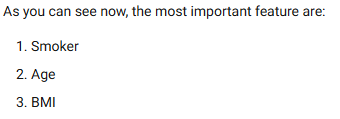

## 8.2 Creating a Test Set

In [351]:
from sklearn.model_selection import train_test_split

In [355]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [357]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5717.5777501674775


In [359]:
# Let's compare this with the training loss.

# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6079.655758333452


## 8.3 How to Approach a Machine Learning Problem

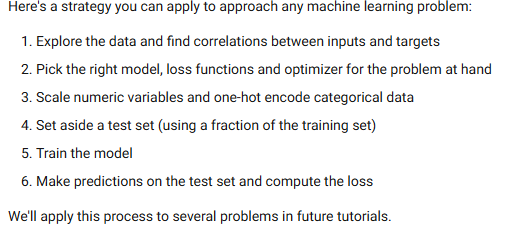